In [42]:
from torch.utils.data import DataLoader
from data.data.dataloader import CWRUDataset, custom_collate_fn

size = 2**14 # 16384
recovery = 0.95

train_dataset = CWRUDataset(
    fault_filter=['normal', 'inner', 'outer'],
    window_size=size,
    stride=int(size * (1 - recovery)))

test_dataset = CWRUDataset(
    fault_filter=['ball'],
    window_size=size,
    stride=int(size * (1 - recovery)))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=custom_collate_fn)

8192 16384


Text(0, 0.5, 'Amplitude')

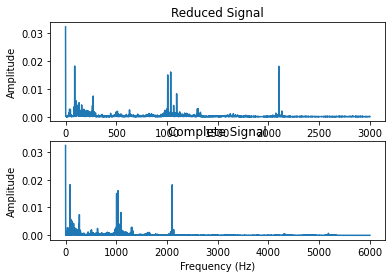

In [43]:
import torch
import matplotlib.pyplot as plt
# Get the first batch from the DataLoader
first_batch = next(iter(train_loader))
# Extract the signals from the batch
signals_reduce = torch.stack(first_batch['vibration_fft_reduce']).unsqueeze(1)  # (batch_size, 1, signal_length)
signals_complete = torch.stack(first_batch['vibration_fft_complete']).unsqueeze(1)  # (batch_size, 1, signal_length)
Nr = signals_reduce.shape[2]  # Length of the signal
Nc = signals_complete.shape[2]  # Length of the signal

fs = 12000  # Sampling frequency
sub_fs = fs/(Nc//Nr)

freq_reduce = torch.fft.rfftfreq(Nr, d=1/sub_fs)  # Frequency bins for reduced signal
freq_complete = torch.fft.rfftfreq(Nc, d=1/fs)  # Frequency bins for complete signal

print(Nr,Nc)
# Get the first signal from the batch
plt.subplot(2, 1, 1)
plt.plot(freq_reduce.numpy(), signals_reduce[0, 0, :freq_reduce.shape[0]].numpy())
plt.title('Reduced Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(freq_complete.numpy(), signals_complete[0, 0, :freq_complete.shape[0]].numpy())
plt.title('Complete Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


In [44]:
signals_complete.shape, signals_reduce.shape, freq_complete.shape, freq_reduce.shape

(torch.Size([32, 1, 16384]),
 torch.Size([32, 1, 8192]),
 torch.Size([8193]),
 torch.Size([4097]))

In [45]:
signals_complete[...,::4].shape

torch.Size([32, 1, 4096])